In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
%config InlineBackend.figure_format = 'svg'  # Looks MUCH better than retina
# %config InlineBackend.figure_format = 'retina'

from sklearn import tree

import dtreeviz
from dtreeviz import decision_boundaries


### Load the Data set
df = pd.read_csv("diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df = df.loc[df['BMI'] > 0]
df = df.loc[df['BloodPressure'] > 0]
df = df.loc[df['Glucose'] > 0]

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df[df['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Accuracy 0.7862
Precision 0.6429
Recall 0.6279
F1 0.6353


[Text(0.5, 0.875, 'Glucose <= 127.5\nentropy = 0.939\nsamples = 579\nvalue = [373, 206]\nclass = No Diabetes'),
 Text(0.25, 0.625, 'BMI <= 26.95\nentropy = 0.721\nsamples = 361\nvalue = [289, 72]\nclass = No Diabetes'),
 Text(0.125, 0.375, 'DiabetesPedigreeFunction <= 0.675\nentropy = 0.079\nsamples = 102\nvalue = [101, 1]\nclass = No Diabetes'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 86\nvalue = [86, 0]\nclass = No Diabetes'),
 Text(0.1875, 0.125, 'entropy = 0.337\nsamples = 16\nvalue = [15, 1]\nclass = No Diabetes'),
 Text(0.375, 0.375, 'Age <= 28.5\nentropy = 0.847\nsamples = 259\nvalue = [188, 71]\nclass = No Diabetes'),
 Text(0.3125, 0.125, 'entropy = 0.603\nsamples = 129\nvalue = [110, 19]\nclass = No Diabetes'),
 Text(0.4375, 0.125, 'entropy = 0.971\nsamples = 130\nvalue = [78, 52]\nclass = No Diabetes'),
 Text(0.75, 0.625, 'BMI <= 29.95\nentropy = 0.962\nsamples = 218\nvalue = [84, 134]\nclass = Diabetes'),
 Text(0.625, 0.375, 'Age <= 61.0\nentropy = 0.913\nsamples = 64

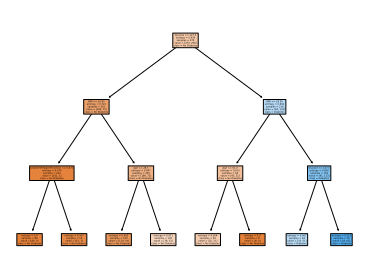

In [8]:
from sklearn.model_selection import train_test_split
X = df[['BloodPressure', 'Age', 'Insulin', 'Glucose', 'BMI', 'Pregnancies', 'SkinThickness', 'DiabetesPedigreeFunction']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the model
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=3, min_samples_split=2, min_samples_leaf=1)
clf.fit(X_train, y_train)

### Qualitative Evaluation
y_preds = clf.predict(X_test)
print("Accuracy %.4f" % accuracy_score(y_test, y_preds))
print("Precision %.4f" % precision_score(y_test, y_preds))
print("Recall %.4f" % recall_score(y_test, y_preds))
print("F1 %.4f" % f1_score(y_test, y_preds))

### Display the current tree
plot_tree(clf, feature_names = list(X.columns), class_names = ['No Diabetes', 'Diabetes'],filled = True)

In [9]:
featureNames = X.columns

In [10]:
clf.feature_importances_

array([0.        , 0.12471816, 0.        , 0.52221823, 0.33651198,
       0.        , 0.        , 0.01655163])

In [11]:
featureImportance = pd.DataFrame(clf.feature_importances_, index = featureNames).sort_values(0, ascending=False)
featureImportance

,0
Glucose,0.522218
BMI,0.336512
Age,0.124718
DiabetesPedigreeFunction,0.016552
BloodPressure,0.000000
Insulin,0.000000
Pregnancies,0.000000
SkinThickness,0.000000


In [12]:
from sklearn.metrics import classification_report
print("Test Set: ")
print(classification_report(y_test, y_preds, target_names=['0','1']))

Test Set: 
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       102
           1       0.64      0.63      0.64        43

    accuracy                           0.79       145
   macro avg       0.74      0.74      0.74       145
weighted avg       0.78      0.79      0.79       145



In [15]:
clf.predict_proba(X_test)

array([[0.625     , 0.375     ],
       [0.85271318, 0.14728682],
       [0.6       , 0.4       ],
       [0.39285714, 0.60714286],
       [0.11428571, 0.88571429],
       [0.6       , 0.4       ],
       [0.85271318, 0.14728682],
       [0.85271318, 0.14728682],
       [0.6       , 0.4       ],
       [0.625     , 0.375     ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.85271318, 0.14728682],
       [1.        , 0.        ],
       [0.6       , 0.4       ],
       [0.85271318, 0.14728682],
       [0.85271318, 0.14728682],
       [0.85271318, 0.14728682],
       [0.6       , 0.4       ],
       [0.39285714, 0.60714286],
       [0.85271318, 0.14728682],
       [1.        , 0.        ],
       [0.39285714, 0.60714286],
       [1.        , 0.        ],
       [0.85271318, 0.14728682],
       [0.85271318, 0.14728682],
       [1.        , 0.        ],
       [0.85271318, 0.14728682],
       [0.11428571, 0.88571429],
       [0.625     , 0.375     ],
       [0.